 

# 1.   Preprocessing






  ## 1.1.   Importing Libraries

In [0]:
import cv2
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
from sklearn.neighbors    import KNeighborsClassifier
from sklearn              import metrics
from sklearn.metrics      import accuracy_score
from skimage              import feature

%matplotlib inline

## 1.2.   Mounting Google Drive


In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
cd /content/gdrive/My\ Drive/a1

/content/gdrive/My Drive/a1


In [4]:
ls

13326487_Krut_A1_ANN.ipynb  t10k-images-idx3-ubyte.gz
13326487_Krut_A1.ipynb      t10k-labels-idx1-ubyte.gz
13326487_Krut_A1_KNN.ipynb  train-images-idx3-ubyte.gz
13326487_Krut_A1_SVM.ipynb  train-labels-idx1-ubyte.gz
DNN_A1.ipynb




## 1.3.   Dataset Preparation




In [0]:
#defining the loading function
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
#Importing data into variables
x_train, y_train = load_mnist('/content/gdrive/My Drive/a1', kind='train')
x_test, y_test = load_mnist('/content/gdrive/My Drive/a1', kind='t10k')
# initialize the label names

labelNames = ["0", "1", "2","3", "4", "5", "6", "7", "8", "9"]

In [7]:
#checking Dimentions of x_train
np.shape(x_train)

(60000, 784)

In [0]:
#converting vector data into Pixels
p_x_train = x_train.reshape(-1,28,28)
p_x_test = x_test.reshape(-1,28,28)

In [0]:
#Normalizing Data
n_x_train = x_train / 255
n_x_test = x_test / 255

In [0]:
# Reshaping Normalized data
r_x_train = n_x_train.reshape(-1,28,28)
r_x_test = n_x_test.reshape(-1,28,28)

In [11]:
#checking Dimentions of x_train
np.shape(r_x_train)

(60000, 28, 28)



## 1.4.   Image Plotting (Visualization)



In [0]:
#storing image from each class
int_labels =np.asarray(labelNames, dtype=np.int)
class_img = []

for i in range(0,10):
  train_list = list(y_train)
  inter = train_list.index(int_labels[i])
  class_img.append(inter)

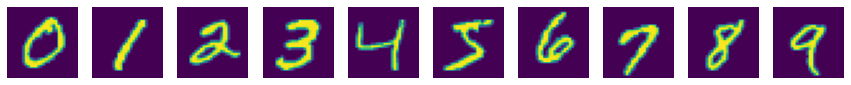

In [13]:
#plotting image of each class
fig = plt.figure(figsize=(15,15))
for i in range (1,11):
  fig.add_subplot(1,10,i)
  plt.imshow(p_x_train[class_img[i-1]])
  plt.axis('off')

plt.show()



# 2.   Feature Extraction




## 2.1.   HoG




In [14]:
# Extracting HoG feature from training dataset
h_x_train = []
h_y_train = []

#Extracting feature from one image at a time
for i in range(len(r_x_train)):
  img = (r_x_train[i])
  hog = feature.hog(img, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  h_x_train.append(hog)
  h_y_train.append(y_train[i])



print(np.shape(h_x_train))
print(np.shape(h_y_train))

(60000, 36)
(60000,)


In [15]:
# Extracting HoG feature from testing dataset
h_x_test = []
h_y_test = []

for i in range(len(r_x_test)):
  hog_img = (r_x_test[i])
  hog = feature.hog(hog_img, orientations=9, pixels_per_cell=(10,10), cells_per_block=(2,2), transform_sqrt=True, block_norm="L2-Hys")

  h_x_test.append(hog)
  h_y_test.append(y_test[i])


print(np.shape(h_x_test))
print(np.shape(h_y_test))
print(h_y_test[0])

(10000, 36)
(10000,)
7




## 2.2.   LBP



In [0]:
#defining LBP
class LocalBinaryPatterns:
  #initializing function
	def __init__(self, numPoints, radius):
		self.numPoints = numPoints
		self.radius = radius
 
 #function to extract LBP feature
	def LBPfeatures(self, image, eps=1e-7):
		lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    #converting it to histogram
		(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		return hist

In [17]:
# Creating object and extracting LBP feature from training data
lbp_obj = LocalBinaryPatterns(24, 8)
l_x_train = []
l_y_train = []

# Processing one Image at a time
for i in range(len(r_x_train)):
	lbp_img = (r_x_train[i])
	lbp_hist = lbp_obj.LBPfeatures(lbp_img)
	l_x_train.append(lbp_hist)
	l_y_train.append(y_train[i])
 

print(np.shape(l_x_train))
print(np.shape(l_y_train))

(60000, 26)
(60000,)


In [18]:
# Creating object and extracting LBP feature from testing data
lbp_obj = LocalBinaryPatterns(24, 8)
l_x_test = []
l_y_test = []

# Processing one Image at a time
for i in range(len(r_x_test)):
	lbp_img = (r_x_test[i])
	lbp_hist = lbp_obj.LBPfeatures(lbp_img)
	l_x_test.append(lbp_hist)
	l_y_test.append(y_test[i])
 

print(np.shape(l_x_test))
print(np.shape(l_y_test))

(10000, 26)
(10000,)




# 4.   KNN






## 4.1.   Training and evaluating KNN with LBP



In [19]:
#training KNN with LBP feature
lbp_knn = KNeighborsClassifier(n_neighbors=5)
lbp_knn.fit(l_x_train, l_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(lbp_knn.score(l_x_train,l_y_train)))

Train set Accuracy: 0.61


In [0]:
# Predicting lables of testing set 
lbp_knn_pred = lbp_knn.predict(l_x_test)

In [22]:
#measuring test accuracy
lbp_knn_acc = metrics.accuracy_score(l_y_test, lbp_knn_pred)
print("Accuracy on test dataset:",lbp_knn_acc)

Accuracy on test dataset: 0.4558


In [23]:
# plot the confusion matrix
print("Y axis represents the actual label with 0 as lower and 9 as upper")
print("X axis represents the predicted label with 0 as leftmost and 9 as rightmost")
cm  = metrics.confusion_matrix(l_y_test, lbp_knn_pred)
print(cm)

Y axis represents the actual label with 0 as lower and 9 as upper
X axis represents the predicted label with 0 as leftmost and 9 as rightmost
[[ 875    0   12   16    9   38    7    5    3   15]
 [   0 1095    5    3    1    3    3   20    4    1]
 [  36    7  490  132   51   54   66   96   77   23]
 [  50   10  200  281   62  110   78   75   96   48]
 [  14    5  133   95  365   62   48   42   59  159]
 [ 134   13  144  171   49  142   50   92   44   53]
 [  53    9  208  153   76   76  116   69  116   82]
 [  16   57  121   91   52   79   51  507   22   32]
 [  41    4  120  147   60   35   91   17  407   52]
 [  60   19   49  116  217   66  106   33   63  280]]


In [0]:
# Display the some classification result on test samples
lbp_knn_img = []
lbp_knn_lbl = []

 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  img = (l_x_test[i])
  prediction = lbp_knn.predict(img.reshape(1, -1))[0]
  image = r_x_test[i]
  lbp_knn_img.append(image)
  lbp_knn_lbl.append(prediction)

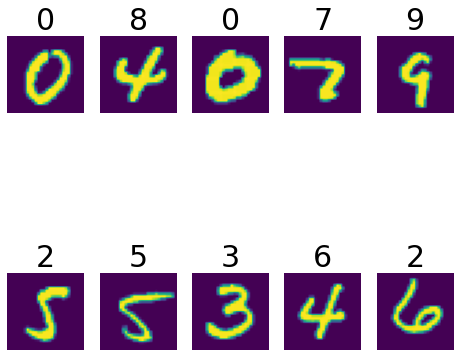

In [25]:
#plotting random predicted outputs
fig = plt.figure(figsize=(8,8))
for i in range (1,11):
  fig.add_subplot(2,5,i)
  plt.title(lbp_knn_lbl[i-1], size= 30)
  plt.imshow(lbp_knn_img[i-1])
  plt.axis('off')

plt.show()

## 4.2.   Training and evaluating KNN with HoG

In [26]:
#training KNN with LBP feature
hog_knn = KNeighborsClassifier(n_neighbors=5)
hog_knn.fit(h_x_train, h_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(hog_knn.score(h_x_train,h_y_train)))

Train set Accuracy: 0.91


In [0]:
# Predicting lables of testing set 
hog_knn_pred = hog_knn.predict(h_x_test)

In [29]:
#measuring test accuracy
hog_knn_acc = metrics.accuracy_score(h_y_test, hog_knn_pred)
print("Accuracy on test dataset:",hog_knn_acc)

Accuracy on test dataset: 0.8766


In [30]:
# plot the confusion matrix
print("Y axis represents the actual label with 0 as lower and 9 as upper")
print("X axis represents the predicted label with 0 as leftmost and 9 as rightmost")
cm  = metrics.confusion_matrix(h_y_test, hog_knn_pred)
print(cm)

Y axis represents the actual label with 0 as lower and 9 as upper
X axis represents the predicted label with 0 as leftmost and 9 as rightmost
[[ 908    4    6    1    1    3   21    2   23   11]
 [   4 1121    0    3    1    0    4    1    1    0]
 [  16    3  878   52    7    5    3   37   16   15]
 [   2    3   45  837    0   33    1   18   56   15]
 [   4    2    9    2  847    0   97    1    8   12]
 [   3    1   10   39    0  771   16    1   34   17]
 [  24    1    1    0   36   14  870    0    7    5]
 [  20    7   44   42    1    5    0  875    8   26]
 [  36    0   21   43    5   31   24    1  751   62]
 [  17    3    2   13    1   11    7    3   44  908]]


In [0]:
# Display the some classification result on test samples
hog_knn_img = []
hog_knn_lbl = []

 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  img = (h_x_test[i])
  prediction = hog_knn.predict(img.reshape(1, -1))[0]
  image = r_x_test[i]
  hog_knn_img.append(image)
  hog_knn_lbl.append(prediction)

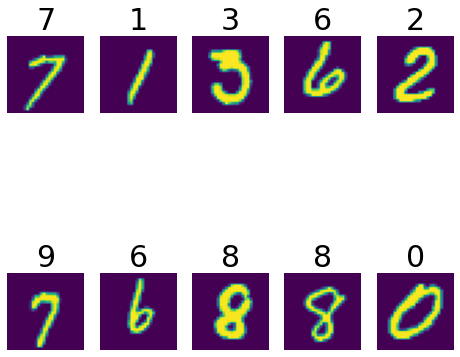

In [32]:
#plotting random predicted outputs
fig = plt.figure(figsize=(8,8))
for i in range (1,11):
  fig.add_subplot(2,5,i)
  plt.title(hog_knn_lbl[i-1], size= 30)
  plt.imshow(hog_knn_img[i-1])
  plt.axis('off')

plt.show()

## 4.3.   Training and evaluating KNN with Raw Data

In [14]:
#training KNN with LBP feature
raw_knn = KNeighborsClassifier(n_neighbors=5)
raw_knn.fit(n_x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(raw_knn.score(n_x_train,y_train)))

In [0]:
# Predicting lables of testing set 
raw_knn_pred = raw_knn.predict(n_x_test)

In [16]:
#measuring test accuracy
raw_knn_acc = metrics.accuracy_score(y_test, raw_knn_pred)
print("Accuracy on test dataset:",raw_knn_acc)

Accuracy on test dataset: 0.9688


In [17]:
# plot the confusion matrix
print("Y axis represents the actual label with 0 as lower and 9 as upper")
print("X axis represents the predicted label with 0 as leftmost and 9 as rightmost")
cm  = metrics.confusion_matrix(y_test, raw_knn_pred)
print(cm)

Y axis represents the actual label with 0 as lower and 9 as upper
X axis represents the predicted label with 0 as leftmost and 9 as rightmost
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [0]:
# Display the some classification result on test samples
raw_knn_img = []
raw_knn_lbl = []

 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  img = (n_x_test[i])
  prediction = raw_knn.predict(img.reshape(1, -1))[0]
  image = r_x_test[i]
  raw_knn_img.append(image)
  raw_knn_lbl.append(prediction)

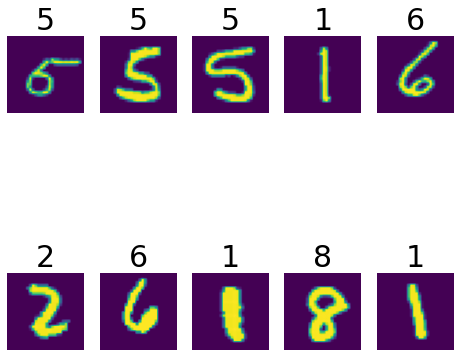

In [19]:
#plotting random predicted outputs
fig = plt.figure(figsize=(8,8))
for i in range (1,11):
  fig.add_subplot(2,5,i)
  plt.title(raw_knn_lbl[i-1], size= 30)
  plt.imshow(raw_knn_img[i-1])
  plt.axis('off')

plt.show()